<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [2]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    
    kernel = 'linear'

    model = SVC(kernel=kernel)
    print "Trying model {}".format(model)
    
    accuracy = np.mean(cross_val_score(model, x, y))

    best_model = model
    best_accuracy = accuracy
    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [3]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.900178
Plotting data set points
Plotting decision region


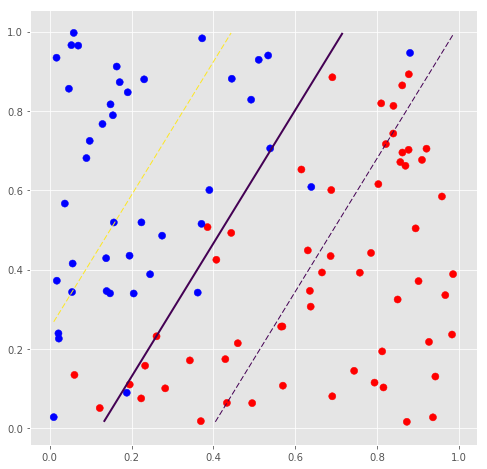

In [4]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.589461
Plotting data set points
Plotting decision region


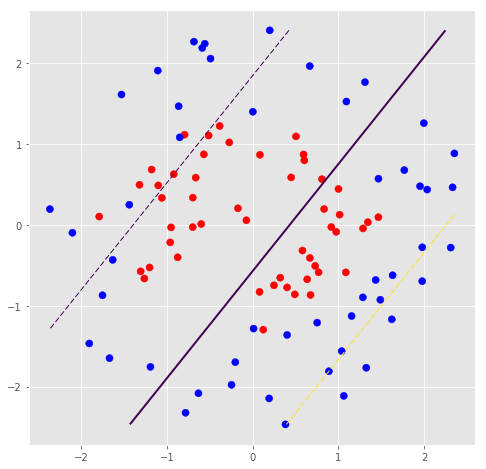

In [5]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.760063
Plotting data set points
Plotting decision region


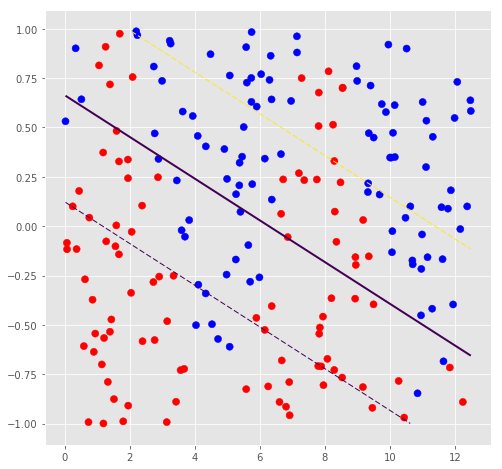

In [6]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [7]:
# Your Code Here
df_titanium = pd.read_csv('titanium.csv', sep=',').dropna()
df_titanium.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


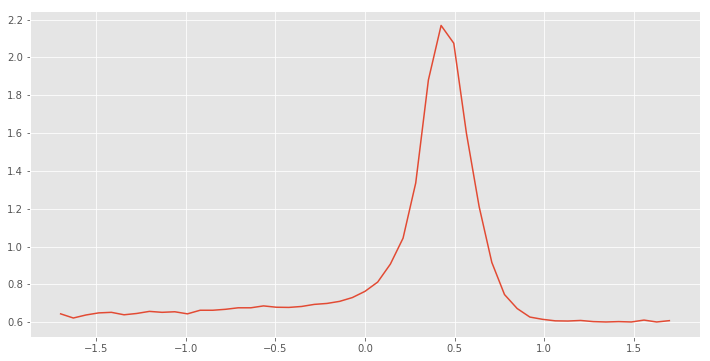

In [8]:
X = df_titanium['x'].values
y = df_titanium['y'].values
X = (X - X.mean(axis = 0))/X.std(axis = 0)
plt.plot(X, y)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [9]:
from sklearn.metrics import mean_absolute_error

In [10]:
X = X.reshape(len(X), 1)

In [11]:
X.shape

(49L, 1L)

In [12]:
## Your Code Here
error_rbf = []
error_lin = []
error_poly = []

for C in np.logspace(-2, 2, 10):
    svr_rbf = SVR(kernel='rbf', C=C, gamma=6, coef0=1)
    svr_lin = SVR(kernel='linear', C=C)
    svr_poly = SVR(kernel='poly', C=C, degree=3, gamma = 6, coef0 = 1)
    y_rbf = svr_rbf.fit(X, y).predict(X)
    y_lin = svr_lin.fit(X, y).predict(X)
    y_poly = svr_poly.fit(X, y).predict(X)
    error_rbf.append(mean_absolute_error(y, y_rbf))
    error_lin.append(mean_absolute_error(y, y_lin))
    error_poly.append(mean_absolute_error(y, y_poly))
    

In [13]:
C = np.logspace(-2, 2, 10)
bestC_rbf = C[error_rbf.index(min(error_rbf))]
bestC_lin = C[error_lin.index(min(error_lin))]
bestC_poly = C[error_poly.index(min(error_poly))]

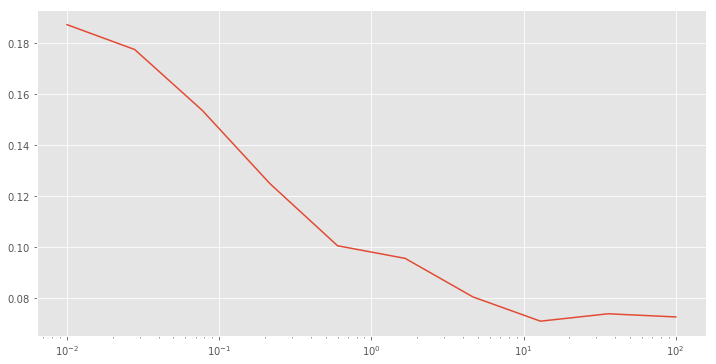

In [14]:
plt.plot(C, error_rbf)
plt.xscale('log')
plt.show()

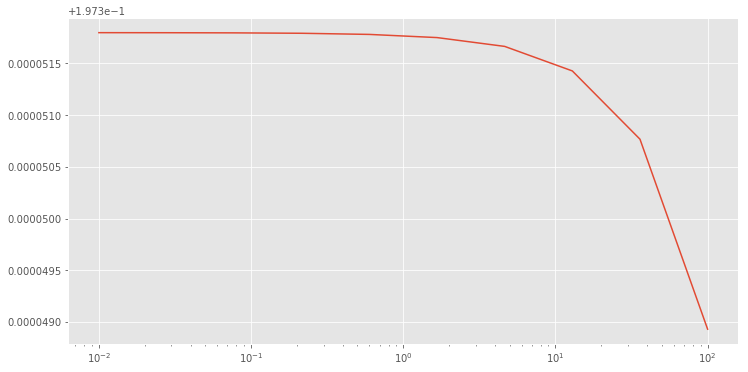

In [15]:
plt.plot(C, error_lin)
plt.xscale('log')
plt.show()

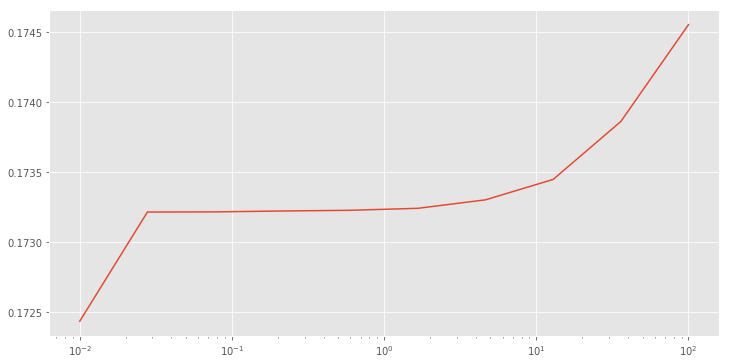

In [16]:
plt.plot(C, error_poly)
plt.xscale('log')
plt.show()

In [17]:
    svr_rbf = SVR(kernel='rbf', C=bestC_rbf, gamma=6, coef0=1)
    svr_lin = SVR(kernel='linear', C=bestC_lin)
    svr_poly = SVR(kernel='poly', C=bestC_poly, degree=3, gamma = 6, coef0 = 1)
    y_rbf = svr_rbf.fit(X, y).predict(X)
    y_lin = svr_lin.fit(X, y).predict(X)
    y_poly = svr_poly.fit(X, y).predict(X)


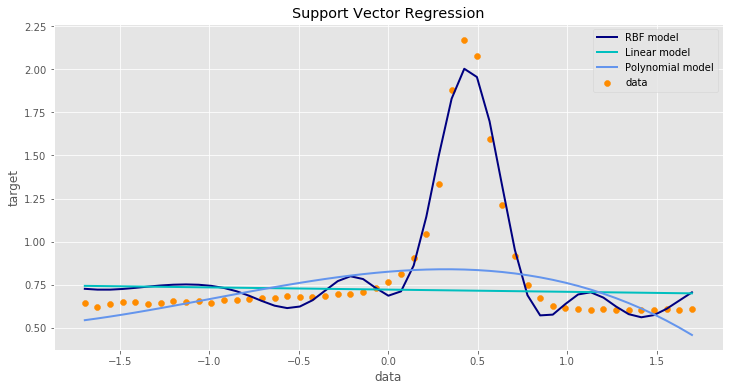

In [18]:

lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()


In [ ]:
#Для линейного и полиномиального ядер наблюдается эффект недообучения, для RBF - переобучения.  

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [19]:
## Your Code Here



In [20]:
import pandas as pd
data = pd.read_csv('war_and_peace_es.txt', sep=" ", header = None)
data.columns = ["word"]


In [21]:
# like this
import numpy as np
data['label'] = 0
data.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


In [22]:
df2 = pd.read_csv('war_and_peace_en.txt', sep=" ", header = None)
df2.columns = ["word"]
df2['label'] = 1
df2.head()

,word,label
0,war,1
1,and,1
2,peace,1
3,leo,1
4,tolstoy,1


In [23]:
df = data.append(pd.DataFrame(data = df2), ignore_index=True)


In [24]:
df['index'] = range(df.shape[0])

In [25]:
df = df[['index', 'word', 'label']]

df.head()

,index,word,label
0,0,guerra,0
1,1,pace,0
2,2,lev,0
3,3,nicoevic,0
4,4,tolstj,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
RND_SEED = 100

In [28]:
dfNew = df[['word', 'label']].sample(n = 1000, random_state = RND_SEED)
dfNew = dfNew.reset_index(drop = True)
dfNew['index'] = range(dfNew.shape[0])
dfNew = dfNew[['index', 'word', 'label']]


In [29]:
dfNew.head()

,index,word,label
0,0,irrequieto,0
1,1,said,1
2,2,she,1
3,3,ils,0
4,4,express,1


In [30]:
train, test = train_test_split(dfNew, test_size = 0.4, random_state = RND_SEED)
X_train, y_train = train['index'], train['label']
X_test, y_test = test['index'], test['label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(dfNew['index'], dfNew['label'], test_size=0.4, random_state= RND_SEED)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [32]:
import pylev

def string_kernel(U, V):
    #Your Code Here
    G_matrix = np.zeros((U.shape[0], V.shape[0]))
    for i, x in enumerate(U):
        for j, y in enumerate(V):
            G_matrix[i, j] = np.exp(-np.sum(np.power(pylev.levenshtein(dfNew['word'][x], 
                                                       dfNew['word'][y]), 2)))
    return G_matrix
    
G = string_kernel(X_train, X_train)

In [33]:
G


array([[  1.00000000e+00,   1.60381089e-28,   1.60381089e-28, ...,
          2.31952283e-16,   6.63967720e-36,   5.24288566e-22],
       [  1.60381089e-28,   1.00000000e+00,   1.38879439e-11, ...,
          5.24288566e-22,   1.38879439e-11,   5.24288566e-22],
       [  1.60381089e-28,   1.38879439e-11,   1.00000000e+00, ...,
          1.12535175e-07,   1.38879439e-11,   1.12535175e-07],
       ..., 
       [  2.31952283e-16,   5.24288566e-22,   1.12535175e-07, ...,
          1.00000000e+00,   2.31952283e-16,   1.23409804e-04],
       [  6.63967720e-36,   1.38879439e-11,   1.38879439e-11, ...,
          2.31952283e-16,   1.00000000e+00,   1.38879439e-11],
       [  5.24288566e-22,   5.24288566e-22,   1.12535175e-07, ...,
          1.23409804e-04,   1.38879439e-11,   1.00000000e+00]])

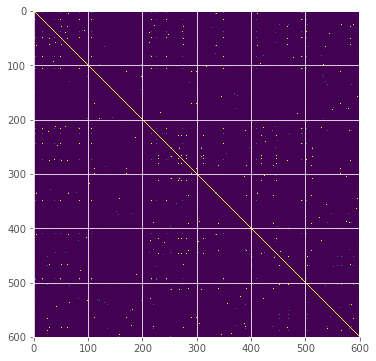

In [34]:
plt.imshow(G)


## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
GTest = string_kernel(X_test, X_train)


In [37]:
# Your Code Here
from sklearn import svm

accuracy_list = []
C_list = np.arange(0.1, 2, 0.1)

for C in C_list:
    clf = svm.SVC(C = C, kernel="precomputed", random_state = RND_SEED)
    model = clf.fit(G, y_train)
    modelPred = model.predict(G)
    pred = model.predict(GTest)
    testAccuracy = accuracy_score(y_test, pred)
    accuracy_list.append(testAccuracy)
    print "Accuracy score for learning: ", accuracy_score(y_train, modelPred)
    print "Accuracy score for testing: ", testAccuracy



Accuracy score for learning:  0.586666666667
Accuracy score for testing:  0.5875
Accuracy score for learning:  0.653333333333
Accuracy score for testing:  0.6625
Accuracy score for learning:  0.703333333333
Accuracy score for testing:  0.705
Accuracy score for learning:  0.766666666667
Accuracy score for testing:  0.725
Accuracy score for learning:  0.816666666667
Accuracy score for testing:  0.7375
Accuracy score for learning:  0.985
Accuracy score for testing:  0.745
Accuracy score for learning:  0.988333333333
Accuracy score for testing:  0.7475
Accuracy score for learning:  0.988333333333
Accuracy score for testing:  0.75
Accuracy score for learning:  0.988333333333
Accuracy score for testing:  0.7625
Accuracy score for learning:  0.988333333333
Accuracy score for testing:  0.7625
Accuracy score for learning:  0.99
Accuracy score for testing:  0.7625
Accuracy score for learning:  0.99
Accuracy score for testing:  0.7625
Accuracy score for learning:  0.99
Accuracy score for testing:

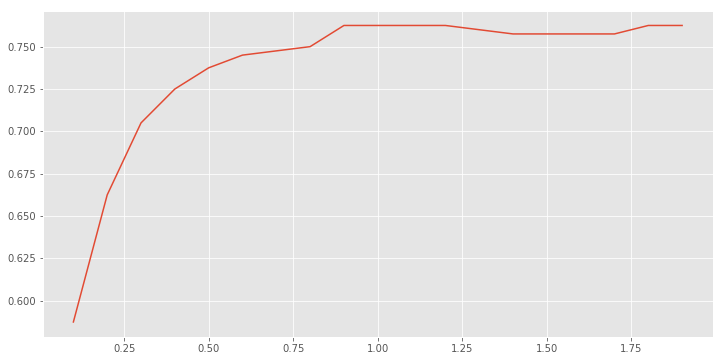

In [38]:
plt.plot(C_list, accuracy_list)